In [156]:
import pandas as pd
import numpy as np

In [157]:
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.experimental import enable_iterative_imputer

In [158]:
data = pd.read_csv("/home/mike/Downloads/data/archive(4)/bank.csv")

In [159]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [160]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [161]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [162]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [163]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [164]:
data["time"] = data['day'].astype(str) +"/"+ data["month"]

In [165]:
data["time"] = data['day'].replace("/2010","")

In [166]:
data["duration"] = pd.to_timedelta()

TypeError: to_timedelta() missing 1 required positional argument: 'arg'

In [167]:
# data['time'] = pd.to_datetime(data['time'], infer_datetime_format=True)

In [168]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,time
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no,19
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no,11
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no,16
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no,3
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no,5


In [169]:
categorigal = ['job', 'marital', 'education', 'default', 'housing',
       'loan', 'contact', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y']
numerical = ['age', 'balance', 'duration', 'campaign', 'pdays',
       'previous']

In [170]:
# simple_imputer = SimpleImputer()
# simple_imputer.fit_transform(data)

In [171]:
data[categorigal] = data[categorigal].astype('category')

In [172]:
data[numerical] = data[numerical].astype('float')

In [173]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        4521 non-null   float64 
 1   job        4521 non-null   category
 2   marital    4521 non-null   category
 3   education  4521 non-null   category
 4   default    4521 non-null   category
 5   balance    4521 non-null   float64 
 6   housing    4521 non-null   category
 7   loan       4521 non-null   category
 8   contact    4521 non-null   category
 9   day        4521 non-null   int64   
 10  month      4521 non-null   object  
 11  duration   4521 non-null   float64 
 12  campaign   4521 non-null   float64 
 13  pdays      4521 non-null   float64 
 14  previous   4521 non-null   float64 
 15  poutcome   4521 non-null   category
 16  y          4521 non-null   category
 17  time       4521 non-null   int64   
dtypes: category(9), float64(6), int64(2), object(1)
memory usage: 359.1+

In [174]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,time
0,30.0,unemployed,married,primary,no,1787.0,no,no,cellular,19,oct,79.0,1.0,-1.0,0.0,unknown,no,19
1,33.0,services,married,secondary,no,4789.0,yes,yes,cellular,11,may,220.0,1.0,339.0,4.0,failure,no,11
2,35.0,management,single,tertiary,no,1350.0,yes,no,cellular,16,apr,185.0,1.0,330.0,1.0,failure,no,16
3,30.0,management,married,tertiary,no,1476.0,yes,yes,unknown,3,jun,199.0,4.0,-1.0,0.0,unknown,no,3
4,59.0,blue-collar,married,secondary,no,0.0,yes,no,unknown,5,may,226.0,1.0,-1.0,0.0,unknown,no,5


In [175]:
import seaborn as sns

In [176]:
import numpy as np

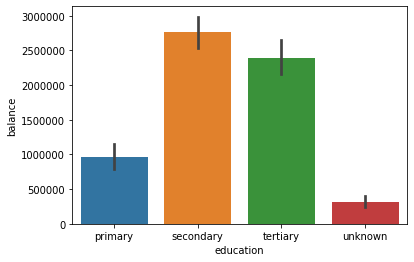

In [177]:
sns.barplot(y='balance', x='education', data=data, estimator=np.sum)

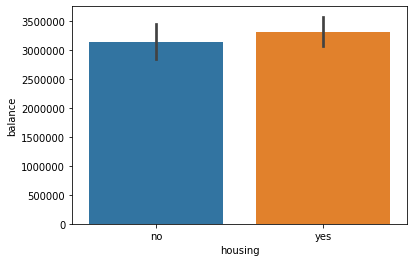

In [178]:
sns.barplot(y='balance', x='housing', data=data, estimator=np.sum)

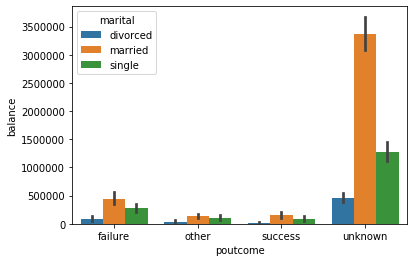

In [179]:
sns.barplot(y='balance', x='poutcome', hue='marital', data=data, estimator=np.sum)

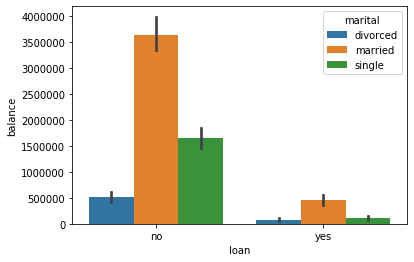

In [180]:
sns.barplot(y='balance', x='loan', data=data, estimator=np.sum, hue='marital')

In [181]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,time
0,30.0,unemployed,married,primary,no,1787.0,no,no,cellular,19,oct,79.0,1.0,-1.0,0.0,unknown,no,19
1,33.0,services,married,secondary,no,4789.0,yes,yes,cellular,11,may,220.0,1.0,339.0,4.0,failure,no,11
2,35.0,management,single,tertiary,no,1350.0,yes,no,cellular,16,apr,185.0,1.0,330.0,1.0,failure,no,16
3,30.0,management,married,tertiary,no,1476.0,yes,yes,unknown,3,jun,199.0,4.0,-1.0,0.0,unknown,no,3
4,59.0,blue-collar,married,secondary,no,0.0,yes,no,unknown,5,may,226.0,1.0,-1.0,0.0,unknown,no,5


In [182]:
import matplotlib.pyplot as plt

In [183]:
plt.figure(figsize=(15,10))
sns.kdeplot('balance',data=data)

TypeError: kdeplot() got multiple values for argument 'data'

<Figure size 1080x720 with 0 Axes>

In [184]:
sns.histplot(x = "data", data = data)

AttributeError: module 'seaborn' has no attribute 'histplot'

In [185]:
data.y.value_counts()

no     4000
yes     521
Name: y, dtype: int64

In [186]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,time
0,30.0,unemployed,married,primary,no,1787.0,no,no,cellular,19,oct,79.0,1.0,-1.0,0.0,unknown,no,19
1,33.0,services,married,secondary,no,4789.0,yes,yes,cellular,11,may,220.0,1.0,339.0,4.0,failure,no,11
2,35.0,management,single,tertiary,no,1350.0,yes,no,cellular,16,apr,185.0,1.0,330.0,1.0,failure,no,16
3,30.0,management,married,tertiary,no,1476.0,yes,yes,unknown,3,jun,199.0,4.0,-1.0,0.0,unknown,no,3
4,59.0,blue-collar,married,secondary,no,0.0,yes,no,unknown,5,may,226.0,1.0,-1.0,0.0,unknown,no,5


In [187]:
data.drop(['day','month','time'], inplace=True, axis=1)

In [188]:
data = pd.get_dummies(data, drop_first=True)

In [190]:
data

,age,balance,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,education_unknown,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown,y_yes
0,30.0,1787.0,79.0,1.0,-1.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,33.0,4789.0,220.0,1.0,339.0,4.0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
2,35.0,1350.0,185.0,1.0,330.0,1.0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
3,30.0,1476.0,199.0,4.0,-1.0,0.0,0,0,0,1,...,0,0,1,1,0,1,0,0,1,0
4,59.0,0.0,226.0,1.0,-1.0,0.0,1,0,0,0,...,0,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33.0,-333.0,329.0,5.0,-1.0,0.0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4517,57.0,-3313.0,153.0,1.0,-1.0,0.0,0,0,0,0,...,0,1,1,1,0,1,0,0,1,0
4518,57.0,295.0,151.0,11.0,-1.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4519,28.0,1137.0,129.0,4.0,211.0,3.0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [189]:
y = data.pop('y')
X = data

KeyError: 'y'

In [ ]:
X = X.values
y = y.values

In [ ]:
# from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score

In [ ]:
data.info()

In [ ]:
data.isnull().sum()

In [ ]:
clf = AdaBoostClassifier(n_estimators=100)
scores = cross_val_score(clf, X, y, cv=5)
scores.mean()